# Bayesian NN Regresion

In [28]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

import matplotlib.pyplot as plt
%matplotlib inline

## Generate Sample Data

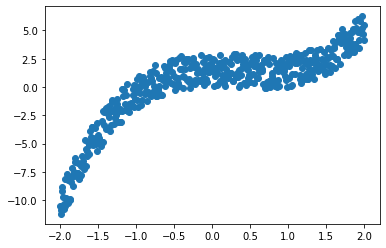

In [29]:
# Generate random data
x = torch.linspace(-2, 2, 500)
y = x.pow(3) - x.pow(2) + 3 * torch.rand(x.size())

# Add a dimension
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

# plot scatter point
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Define a simple model

In [30]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=10),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=10, out_features=1)
).cuda()

In [31]:
# Define Loss and Optimizer

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.1

optimizer = optim.Adam(model.parameters(), lr=0.01)

## Training

In [32]:
for step in range(300):
    pre = model(x.cuda())
    mse = mse_loss(pre, y.cuda())
    kl = kl_loss(model)
    cost = mse + kl_weight * kl

    if step % 100 == 0:
        print('- MSE: %2.2f, KL: %2.2f' % (mse.item(), kl.item()))
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

print('- MSE: %2.2f, KL: %2.2f' % (mse.item(), kl.item()))

- MSE: 13.12, KL: 8.76
- MSE: 2.66, KL: 16.41
- MSE: 2.05, KL: 18.12
- MSE: 2.11, KL: 18.53


## Testing

In [33]:
x_test = torch.linspace(-2, 2, 500)
y_test = x_test.pow(3) - x_test.pow(2) + 3*torch.rand(x_test.size())

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

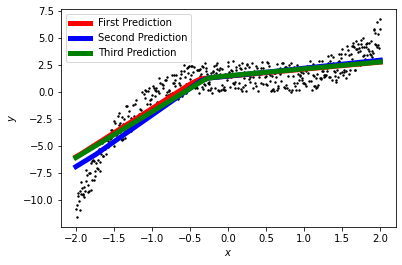

In [34]:
# plot
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.scatter(x_test.data.numpy(), y_test.data.numpy(), color='k', s=2)

y_predict = model(x_test.cuda())
plt.plot(x_test.data.numpy(), y_predict.cpu().data.numpy(), 'r-', linewidth=5, label='First Prediction')

y_predict = model(x_test.cuda())
plt.plot(x_test.data.numpy(), y_predict.cpu().data.numpy(), 'b-', linewidth=5, label='Second Prediction')

y_predict = model(x_test.cuda())
plt.plot(x_test.data.numpy(), y_predict.cpu().data.numpy(), 'g-', linewidth=5, label='Third Prediction')

plt.legend()

plt.show()